
Capstone Project:

In this section, I begin with the excel file of sales data, which I obtained from the Tableau Community Forum. As a recall, the data contains mostly categorical variables and components of the vectors from the description column. The index column is a timeseries format. The major objective of this section is to understand the general trends in the data, and gain some quick insights, and then predict and forcast the Sales of the category "Technology" of the given sales data.The statistical significance of these observations will be also tested in 'Exploratory Data Analysis'.

In [67]:

#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

There are several categories in the Superstore sales data, I start from time series analysis and 
forecasting for Technology sales.

We have a good 4-year furniture sales data.

In [237]:
location=("Users//Superstore.xls")

In [238]:
data_original = pd.read_excel(location)

In [239]:
data_original.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

# data = pd.read_excel(location, 
#                      parse_dates =["Order_Date"] 
#                      index_col   = "Order_Date")

# data.head()

In [6]:
data_original.shape

(9994, 21)

In [7]:
# categories of sales data
data_original.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
# copy only the rows related to category = Technology
Technology = data_original.loc[data_original['Category'] == 'Technology']

In [9]:
Technology.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [10]:
# data_original range
Technology['Order Date'].min(), Technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# Data Exploration:

This step includes removing columns we do not need, check missing values, 
aggregate sales by date and so on.

In [11]:
Technology.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
# columns to drop
cols = ['Row ID', 
        'Order ID', 
        'Ship Date', 
        'Ship Mode', 
        'Customer ID', 
        'Customer Name', 
        'Segment', 
        'Country', 
        'City', 
        'State', 
        'Postal Code', 
        'Region', 
        'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name', 
        'Quantity', 
        'Discount', 
        'Profit']

Technology.drop(cols, axis=1, inplace=True)

In [13]:
Technology.sort_values('Order Date', inplace=True)

In [14]:
# check for null values
Technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [15]:
Technology.columns

Index(['Order Date', 'Sales'], dtype='object')

In [16]:
# Lets check if we have more than one sales data for a date:
temp = Technology.groupby('Order Date')['Sales'].size() 
temp[temp > 1].sort_values(ascending=False)

Order Date
2017-09-24    10
2017-07-03     9
2017-11-13     8
2017-11-12     8
2016-11-24     8
              ..
2016-05-05     2
2016-04-19     2
2016-04-16     2
2016-04-15     2
2014-01-06     2
Name: Sales, Length: 473, dtype: int64

In [17]:
# aggregate sales by date
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()

In [18]:
# Indexing with Time Series Data
Technology = Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [19]:
Technology.sample(10)

,Sales
Order Date,
2015-08-24,3800.912
2015-12-15,5073.420
2016-08-29,117.976
2015-11-07,287.910
2017-05-15,40.712
2017-10-23,1778.920
2014-03-01,5.940
2017-12-05,335.596
2016-12-31,302.376


<Figure size 1152x432 with 0 Axes>

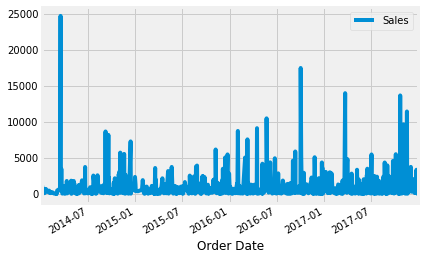

In [20]:
plt.figure(figsize=(16, 6));
Technology.plot();

In [21]:
pd.DatetimeIndex(Technology.index).year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Order Date', length=824)

In [22]:
pd.DatetimeIndex(Technology.index).month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Order Date', length=824)

In [23]:
pd.DatetimeIndex(Technology.index).day

Int64Index([ 6,  9, 13, 15, 16, 20, 26,  1,  2,  6,
            ...
            18, 21, 22, 23, 24, 25, 27, 28, 29, 30],
           dtype='int64', name='Order Date', length=824)

Another useful aspect of the DatetimeIndex is that the individual date/time components are all available as attributes such as year, month, day, and so on. 

Let’s add a few more columns to Technology, containing the year, month, and weekday name.

In [24]:
# Add columns with year, month, and weekday name
Technology['Year']         = pd.DatetimeIndex(Technology.index).year
Technology['Month']        = pd.DatetimeIndex(Technology.index).month
Technology['Weekday Name'] = pd.DatetimeIndex(Technology.index).weekday_name

# Display a random sampling of 5 rows
Technology.sample(10, random_state=0)

,Sales,Year,Month,Weekday Name
Order Date,,,,
2014-07-23,2555.084,2014,7,Wednesday
2014-03-28,302.376,2014,3,Friday
2014-02-02,180.960,2014,2,Sunday
2015-10-20,239.970,2015,10,Tuesday
2017-12-27,164.388,2017,12,Wednesday
2017-10-05,5520.506,2017,10,Thursday
2017-07-21,2180.644,2017,7,Friday
2015-09-03,247.840,2015,9,Thursday
2015-12-18,166.240,2015,12,Friday


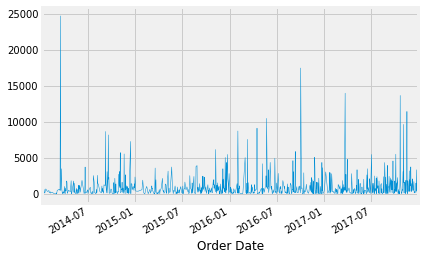

In [25]:
# create a line plot of the full time series of daily sales, 
# using the DataFrame’s plot() method.
Technology['Sales'].plot(linewidth=0.5);

 with so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead.

## Checking for seasonality

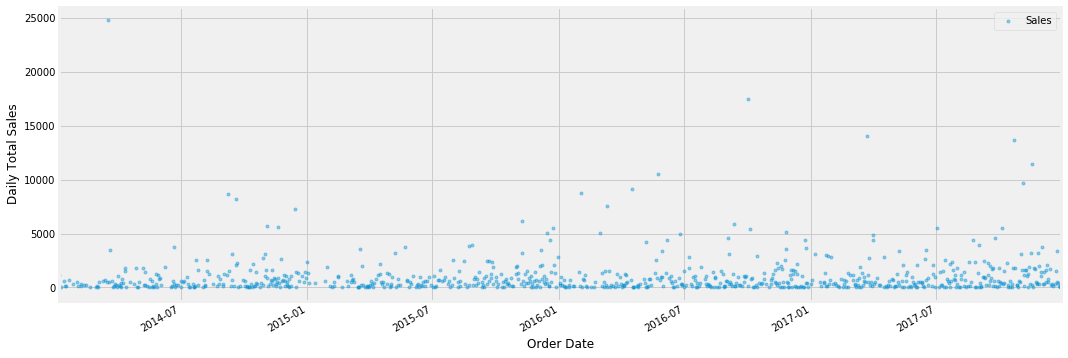

In [26]:
# Use seaborn style defaults and set the default figure size
# sns.set(rc={'figure.figsize':(18, 6)})

cols_plot = ['Sales']

axes      = Technology[cols_plot].plot(marker='.',
                                       alpha=0.4, 
                                       linestyle='None', 
                                       figsize=(16, 6), 
                                       subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Total Sales')

** Seasonality is not very obvious. let us plot series for every year **

** Yearly sales - No resampling **

#### Checking Seasonality using Box-Plots:

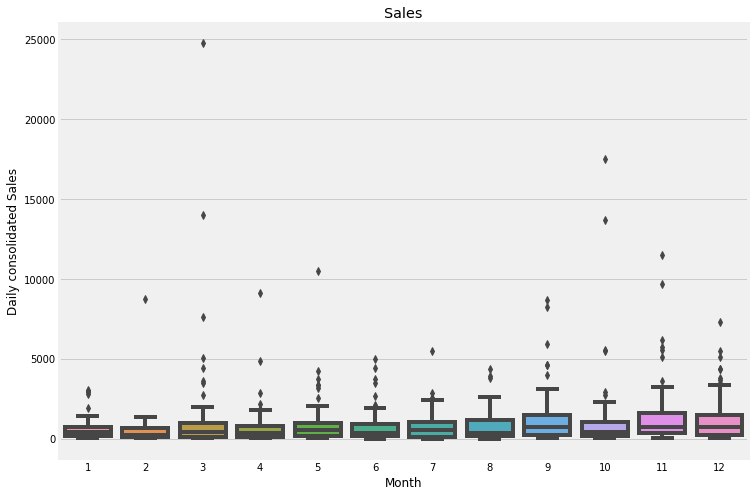

In [27]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=Technology, x='Month', y='Sales', ax=ax)

ax.set_title('Sales')

ax.set_ylabel('Daily consolidated Sales');

In [28]:
Technology.loc['2014':]

,Sales,Year,Month,Weekday Name
Order Date,,,,
2014-01-06,1147.940,2014,1,Monday
2014-01-09,31.200,2014,1,Thursday
2014-01-13,646.740,2014,1,Monday
2014-01-15,149.950,2014,1,Wednesday
2014-01-16,124.200,2014,1,Thursday
...,...,...,...,...
2017-12-25,401.208,2017,12,Monday
2017-12-27,164.388,2017,12,Wednesday
2017-12-28,14.850,2017,12,Thursday


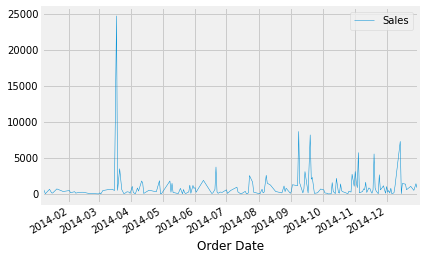

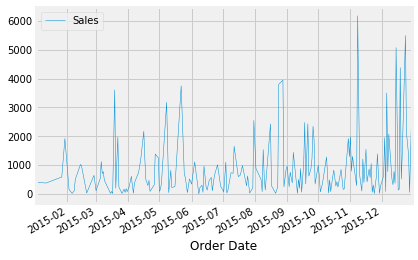

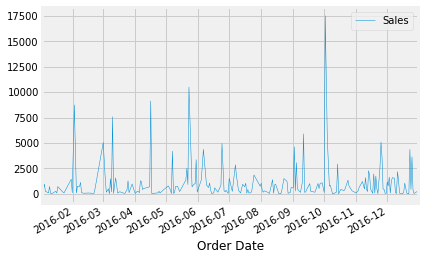

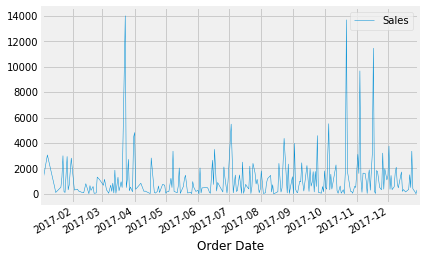

In [29]:

cols_plot = ['Sales']

Technology.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology.loc['2017'][cols_plot].plot(linewidth=0.5);

#### observation:

- the trend, seasonality is not obvious from the above plots, as there are a lots of data points.

- There seems to indication of seasonality at the end of the year 2015 and 2017, but we can not see the certain seasonality.

- we can roll-up the data, weekly & monthly and then re-plot

** sales - Weekly resampling **

In [30]:
# weekly sales
data_columns = ['Sales']

# Resample to weekly frequency, aggregating with mean
Technology_weekly = Technology[data_columns].resample('W').sum()
Technology_weekly.head()

,Sales
Order Date,
2014-01-12,1179.14
2014-01-19,920.89
2014-01-26,1043.26
2014-02-02,649.86
2014-02-09,421.92


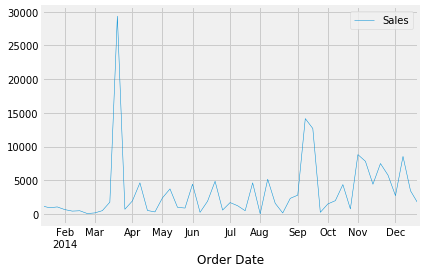

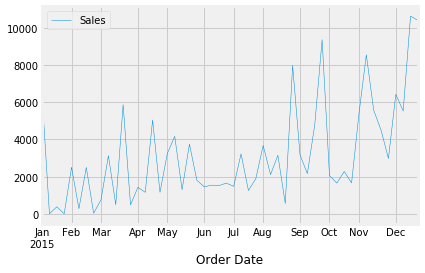

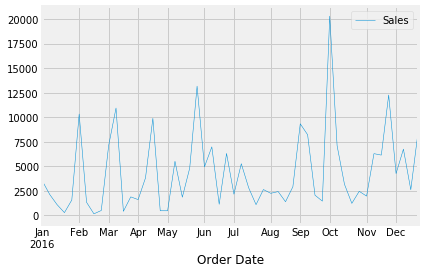

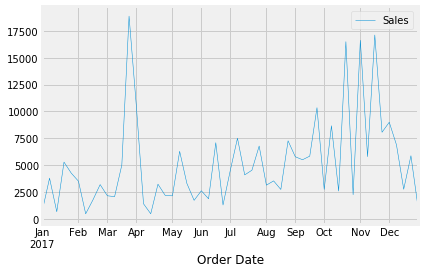

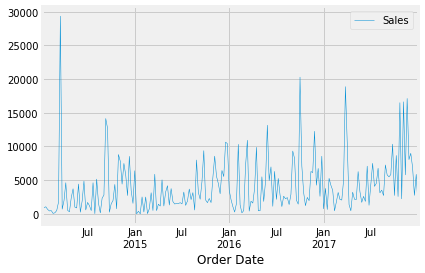

In [31]:
cols_plot = ['Sales']

Technology_weekly.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology_weekly.loc['2017'][cols_plot].plot(linewidth=0.5);
Technology_weekly[cols_plot].plot(linewidth=0.5);

** sales - Monthly resampling **

In [32]:
# monthly sales
data_columns = ['Sales']

# Resample to weekly frequency, aggregating with mean
Technology_monthly = Technology[data_columns].resample('M').sum()
Technology_monthly.head(3)

,Sales
Order Date,
2014-01-31,3143.290
2014-02-28,1608.510
2014-03-31,32511.174


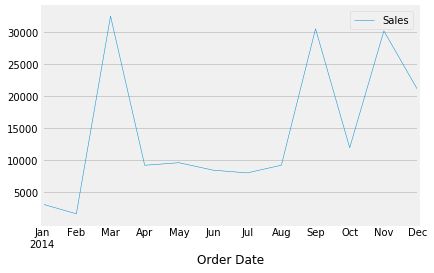

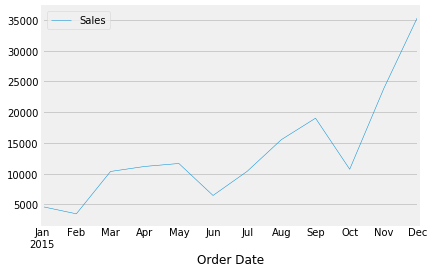

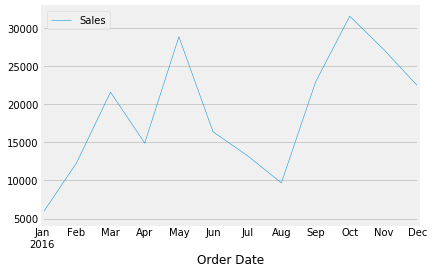

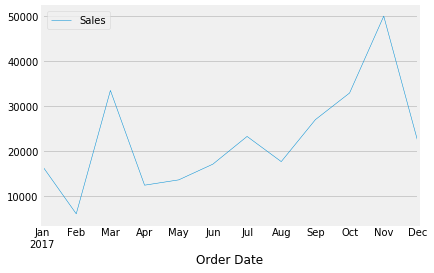

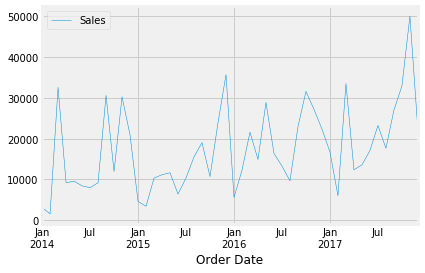

In [33]:
cols_plot = ['Sales']

Technology_monthly.loc['2014'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2015'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2016'][cols_plot].plot(linewidth=0.5);
Technology_monthly.loc['2017'][cols_plot].plot(linewidth=0.5);
Technology_monthly[cols_plot].plot(linewidth=0.5);

#### observation

- Every year, there is slight uptrend visible
- sales up in the months of Sep-Oct-Nov
- Consolidated 4 years - slight uptrend in sales numbers
- sales picks up in the last QTR of every calender year(Except December), indicates seasonality


### Checking for trend:

In [34]:
# define a function to check trend and plot

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df, 
             marker='.', 
             linestyle='-', 
             linewidth=0.5,
             color='blue',  
             label='Original')
    
    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o', 
             markersize=8, 
             linestyle='-', 
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()

Slope 1446.4374930069923
NRMSE: 0.2998774826179322


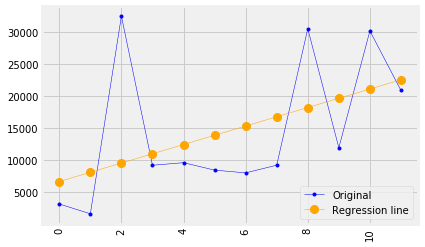

Slope 2035.9554020979017
NRMSE: 0.1567402875440208


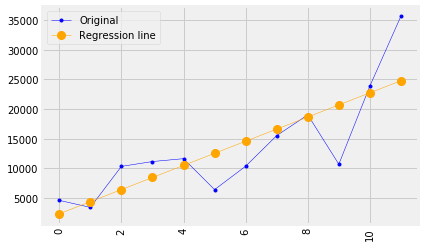

Slope 1282.545860139859
NRMSE: 0.24543983973553118


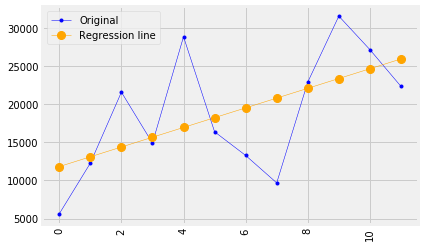

Slope 1887.720569930069
NRMSE: 0.2110086979111077


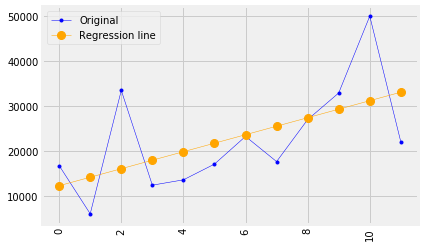

Slope [333.14990377]
NRMSE: 0.1910916756506426


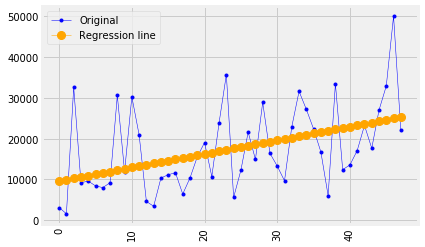

In [35]:
# check for trend
cols_plot = ['Sales']

detect_trend(Technology_monthly.loc['2014']['Sales'].values)
detect_trend(Technology_monthly.loc['2015']['Sales'].values)
detect_trend(Technology_monthly.loc['2016']['Sales'].values)
detect_trend(Technology_monthly.loc['2017']['Sales'].values)
detect_trend(Technology_monthly[cols_plot].values)

#### observation:

- Trend is more visible in the monthly sales data
- Consolidated 4 years - uptrend in sales numbers
- sales picks up in the last QTR of every calender year, indicates slight seasonality
- The time-series has slight seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year.There is always an upward trend within any single year with a couple of low months in the mid of the year.

### Lets see how bad  the Time Series is in terms of stationarity:

### (1) Stationarity

- Data points are often __non-stationary__ or have means, variances and covariances that _change over time_. 

- Non-stationary behaviors can be trends, cycles, random walks or combinations of the three.

- Non-stationary data, as a rule, are _unpredictable and cannot be modeled or forecasted._ The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. 

- In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data.


- A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. 

> - constant mean
> - constant variance
> - an autocovariance that does not depend on time.

- Though stationarity assumption is taken in many TS models, almost __none of practical time series are stationary.__

- Most of the TS models work on the _assumption that the TS is stationary._ 

- Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 

#### Why do we care about stationarity? 

- A stationary time series (TS) is simple to predict as we can assume that future statistical properties are the same or proportional to current statistical properties.

- Most of the models we use in TSA assume covariance-stationarity (#3 above). This means the descriptive statistics these models predict e.g. means, variances, and correlations, are only reliable if the TS is stationary and invalid otherwise.

> "For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables." 

- With that said, most TS we encounter in finance is NOT stationary. Therefore a large part of TSA involves identifying if the series we want to predict is stationary, and if it is not we must find ways to transform it such that it is stationary. 

#### check stationarity using the following methods:-

(1) __Rolling Plots__: review a time series plot ( moving average or moving variance) of the data and visually check if there are any obvious trends or seasonality.

(2) __Summary Statistics__: review the summary statistics for the data for seasons or random partitions and check for obvious or significant differences.

(3) __Statistical Tests__: use statistical tests to check if the expectations of stationarity are met or have been violated.

> __Dickey-Fuller Test__: This is one of the statistical tests for checking stationarity. 

> Here the null hypothesis is that the TS is non-stationary. 

> The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 

> If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

#### Stationarity test : Method 1 : Plots 


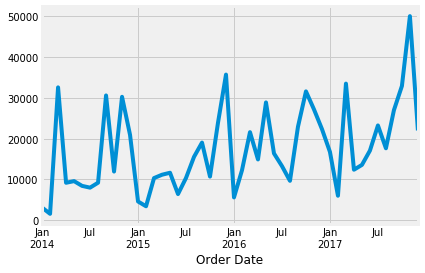

In [36]:
Technology_monthly['Sales'].plot();

#### Stationarity test : Method 2 : Summary Statistics

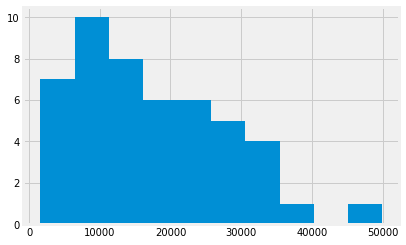

In [37]:
Technology_monthly['Sales'].hist();

- split the time series into 2 contiguous sequences. 

- calculate the mean and variance of each group of numbers and compare the values.

In [38]:
X = Technology_monthly['Sales'].values
split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     =   14085.79, mean2     =   20753.96
variance1 = 93096702.63, variance2 = 97720479.23


- the mean and variance values are different. But in the same ball-park range.
- Hence the time series is stationary


#### Stationarity test : Method 3 : Augmented Dickey-Fuller test - (ADF) test 

- The intuition behind the test is that it determines how strongly a time series is defined by a trend. (i.e no stationarity)

$ H_0 : $ - time series is __not stationary __

$ H_A : $ - time series is stationary 

p-value <= 0.05: Reject the null hypothesis ($H_0$), the data does not have a unit root and is stationary.

> p-value > 0.05: Fail to reject the null hypothesis ($H_0$), the data has a unit root and is non-stationary.

In [39]:
for year in np.unique(Technology.Year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = Technology.loc[str(year)]['Sales'].values

    result = adfuller(X)
    
    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = Technology['Sales'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value)) 


For the year :  2014
ADF Statistic: -13.348559
p-value: 0.000000
Critical Values:
	   1%:   -3.468
	   5%:   -2.878
	  10%:   -2.576

For the year :  2015
ADF Statistic: -12.599571
p-value: 0.000000
Critical Values:
	   1%:   -3.466
	   5%:   -2.877
	  10%:   -2.575

For the year :  2016
ADF Statistic: -13.891029
p-value: 0.000000
Critical Values:
	   1%:   -3.461
	   5%:   -2.875
	  10%:   -2.574

For the year :  2017
ADF Statistic: -15.631518
p-value: 0.000000
Critical Values:
	   1%:   -3.458
	   5%:   -2.874
	  10%:   -2.573

For the CONSOLIDATED 4 years
ADF Statistic: -28.189457
p-value: 0.000000
Critical Values:
	   1%:   -3.438
	   5%:   -2.865
	  10%:   -2.569


#### conclusion

1. Consolidated years - p-value is less than .05 or .01. hence H0 can be rejected. 
3. H0 : Not stationary
2. Means TS is stationary
4. Yearly- p-value method : p-value is $\lt$ 0.05 so we reject the null hypothesis for yearly TS
  

## Making TS stationary:

** define a function to test stationarity **

In [40]:
def test_stationarity(timeseries, reduced_timeseries=None, smoothing_type='R'):
     
    # Plot rolling statistics:
    orig = plt.plot(timeseries,
                    marker='.', 
                    linestyle='-', 
                    linewidth=0.5,
                    color='blue',  
                    label='Original')
    
    mean = plt.plot(reduced_timeseries, 
                    marker='.', 
                    linestyle='-', 
                    linewidth=0.5,
                    color='red',   
                    label='Reduced')
    
    if smoothing_type == 'R':
        title = 'Smoothing by Rolling MA'
    elif smoothing_type == 'E':
        title = 'Smoothing by Exponential weighted MA'
    else:
        title = 'Default MA'
        
    plt.legend(loc='best')
    plt.title(title)
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(reduced_timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)

### Reduce noise

- Aggregation – taking average for a time period like monthly/weekly averages

- Smoothing – taking rolling averages (Moving average)

- Polynomial Fitting – fit a regression model

#### 1. Smoothing - Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

In [41]:
ts=Technology_monthly['Sales']

In [42]:
moving_avg = ts.rolling(window=12).mean()

In [43]:
moving_avg.head()

Order Date
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
Freq: M, Name: Sales, dtype: float64

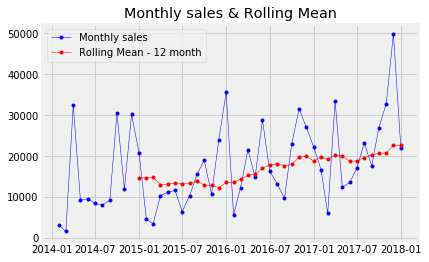

In [44]:
plt.plot(ts, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly sales & Rolling Mean');

Lets the rolling means subtract this from the original series(log transformed).

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [45]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.head(12)

Order Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31            NaN
2014-08-31            NaN
2014-09-30            NaN
2014-10-31            NaN
2014-11-30            NaN
2014-12-31    6286.672583
Freq: M, Name: Sales, dtype: float64

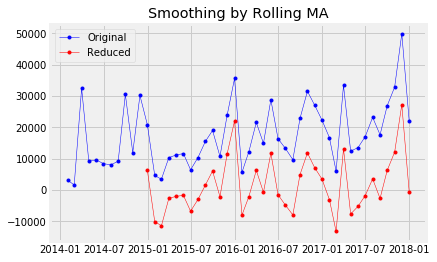

Results of Dickey-Fuller Test:
Test Statistic                 -5.093302
p-value                         0.000014
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [46]:
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts, ts_moving_avg_diff, 'R')

#### observation

- The rolling values appear to be varying slightly but there is no specific trend. 
- Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a __stationary series.__

#### conclusion

1. p-value method : p-value of 0.000014 is $\lt$ 0.05 so we REJECT the null hypothesis. The null hypothesis is : the TS is NON-STATTIONARY. Hence it is proved that TS is stationary
    
2. Critical value  : Our statistic value of -5.093302 is more than the value of 3.626652 at 1%. So this falls in the rejection region. Hence we REJECT the null hypothesis. i.e TS is stationary


#### 2. exponentially weighted moving average

In [47]:
ewma = pd.Series.ewm

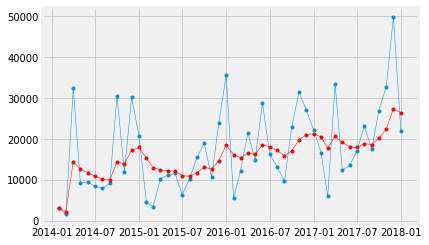

In [48]:
fwd_exp_weighted_avg = ewma(ts, span=10).mean() 

plt.plot(ts, marker='.', linestyle='-', linewidth=0.5,)
plt.plot(fwd_exp_weighted_avg, marker='.', linestyle='-', linewidth=0.5, color='red');

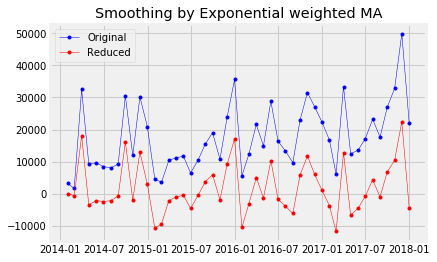

Results of Dickey-Fuller Test:
Test Statistic                -6.686544e+00
p-value                        4.212053e-09
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64


In [49]:
ts_ewma_diff = ts - fwd_exp_weighted_avg
test_stationarity(ts, ts_ewma_diff, 'E')

## Decomposition of a time series into its components(trend, seasonality,noise):

You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The __seasonal_decompose__ in __statsmodels__ implements this conveniently.

visualize our data using a method called time-series decomposition that allows us to decompose our time series into 3 distinct components: 
    - trend, 
    - seasonality, and 
    - noise.

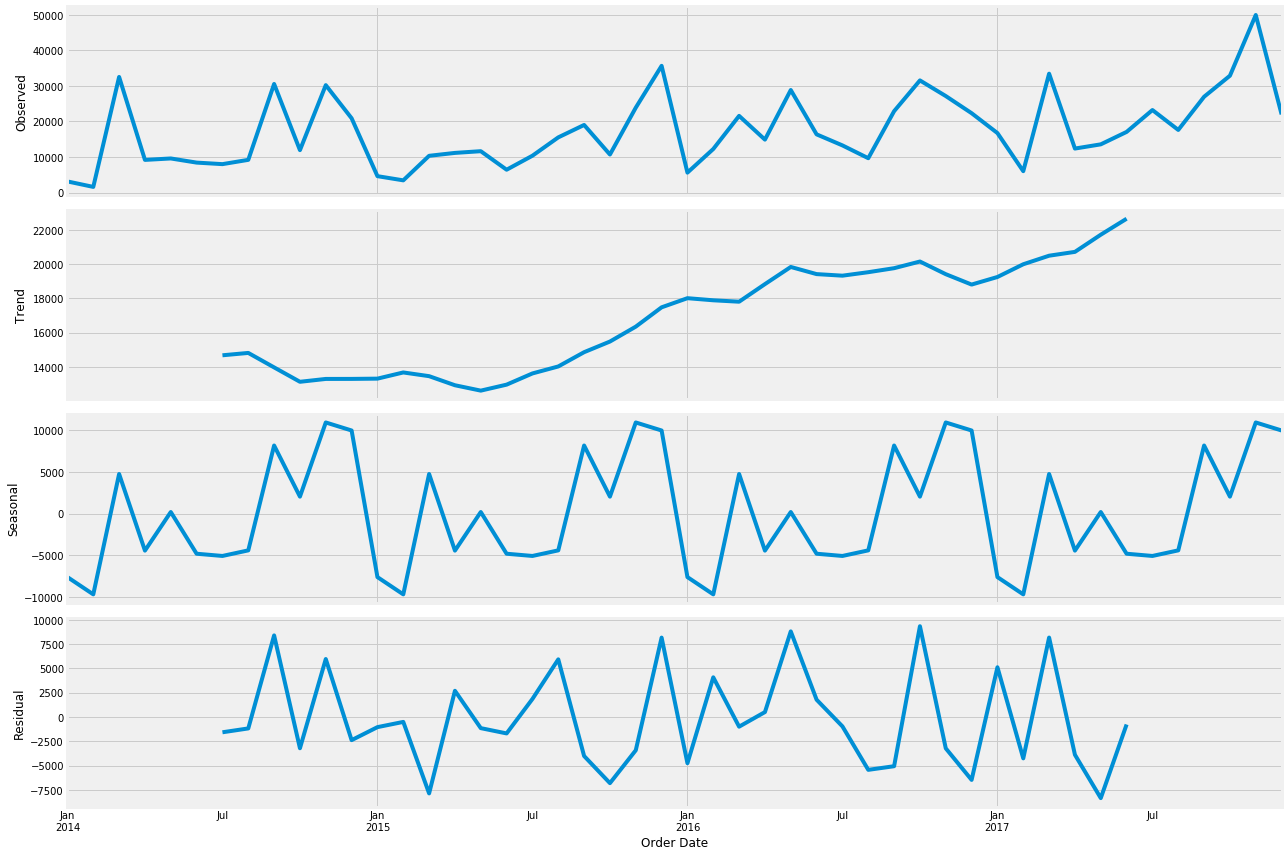

In [50]:
# Multiplicative Decomposition 

rcParams['figure.figsize'] = 18, 12

result_additive = seasonal_decompose(Technology_monthly['Sales'],
                                     model='additive')

fig = result_additive.plot()

The plot above clearly shows that the sales of Technology is unstable, 
along with its obvious seasonality.We can still see noises.

# Time series forecasting with ARIMA


- ARIMA, short for __‘Auto Regressive Integrated Moving Average’__ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

- Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

- An ARIMA model is characterized by 3 terms: p, d, q where,

    - p is the order of the AR term
    - q is the order of the MA term
    - d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. 

#### d term

- The first step to build an ARIMA model is to make the time series stationary. Why?

- Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

- The most common approach is to __difference__ it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

- The value of __d__, therefore, is the minimum number of differencing needed to make the series stationary. 

- And if the time series is already stationary, then d = 0.

#### Next, what are the ‘p’ and ‘q’ terms?

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 

- And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

** ARIMA model in words:**

Predicted $Y_t$ = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

# (1) How to find the order of differencing (d) in ARIMA model

- The purpose of differencing it to make the time series stationary.

- But we need to be careful to not over-difference the series. Because, an over differenced series may still be non-stationary, which in turn will affect the model parameters.

- ** So how to determine the right order of differencing? **

- The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. 

- On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

(1) First, check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

    - Because, you need differencing only if the series is non-stationary. 
    - Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). 

These three parameters account for seasonality, trend, and noise in data:

In [51]:
Technology.columns

Index(['Sales', 'Year', 'Month', 'Weekday Name'], dtype='object')

In [52]:
ts.head()

Order Date
2014-01-31     3143.290
2014-02-28     1608.510
2014-03-31    32511.174
2014-04-30     9195.434
2014-05-31     9599.876
Freq: M, Name: Sales, dtype: float64

In [53]:
# check stationarity
result = adfuller(Technology.loc['2015']['Sales'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.599571
p-value: 0.000000


Since P-value is less than the significance level of 0.05, that means we should reject the null hypothesis.

H0 : TS is non stationary
    
It means the TS is stationary

let us check with ACF plot

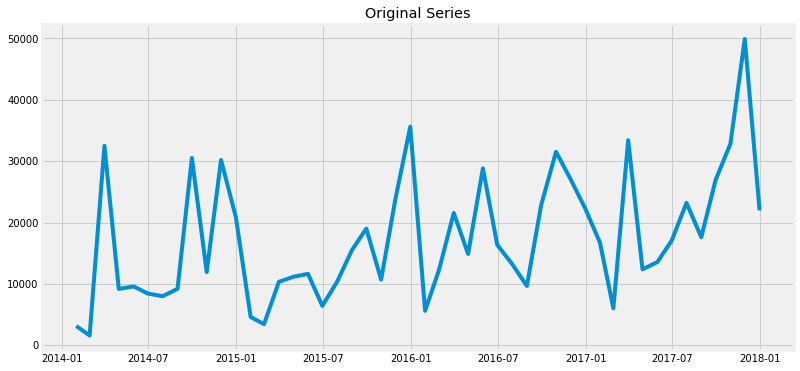

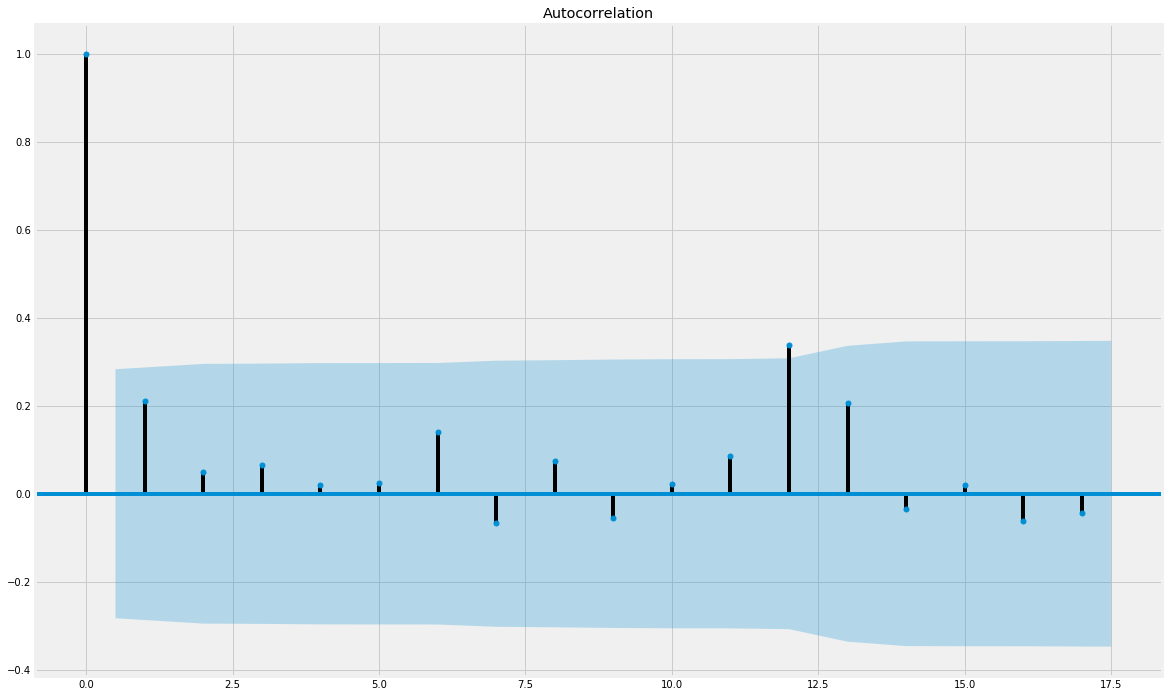

In [54]:
# Original Series
# fig, axes = plt.subplots(6, 1, sharex=True)
#fig, axes = plt.subplots(3, 2, figsize=(11, 8))
plt.figure(figsize=(12, 6))

plt.plot(ts)
plt.title('Original Series')
acf0 = plot_acf(ts)

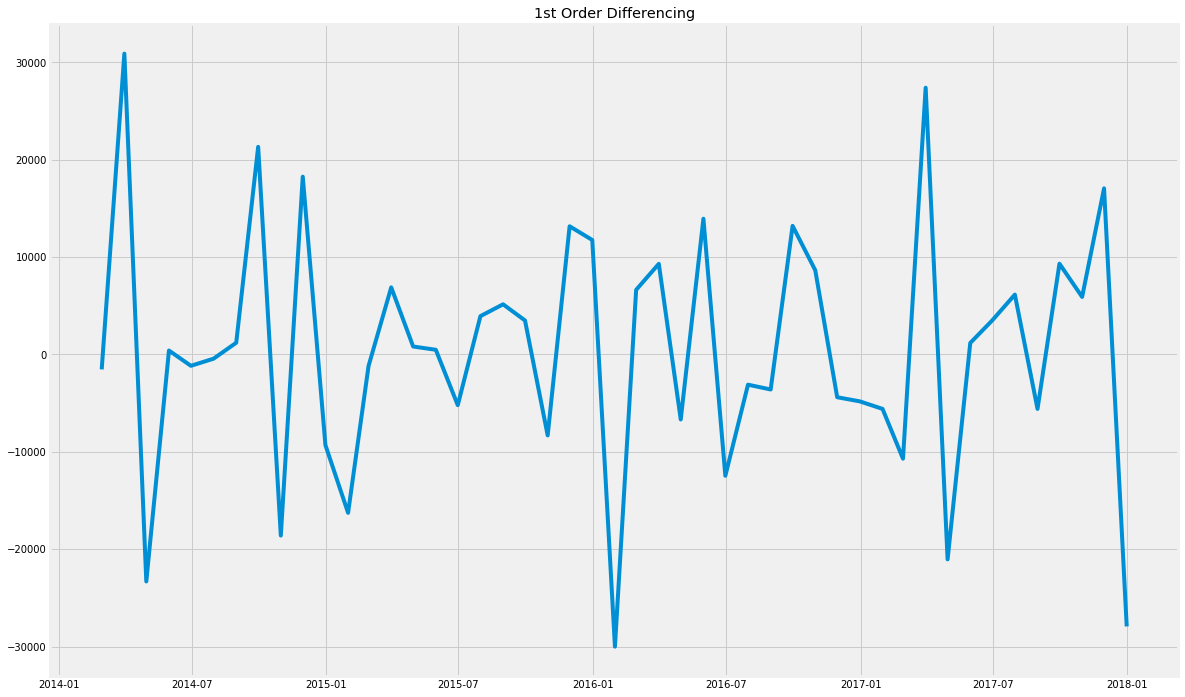

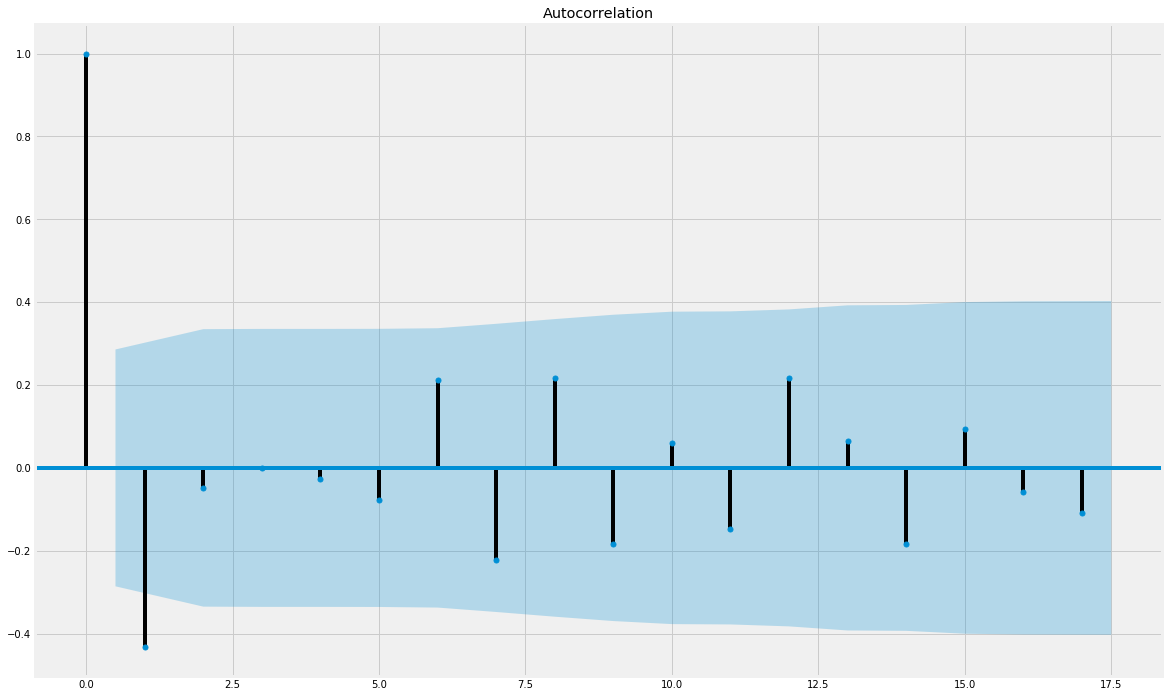

In [55]:
# 1st order Differencing
plt.plot(ts.diff()); 
plt.title('1st Order Differencing')
acf1 = plot_acf(ts.diff().dropna())

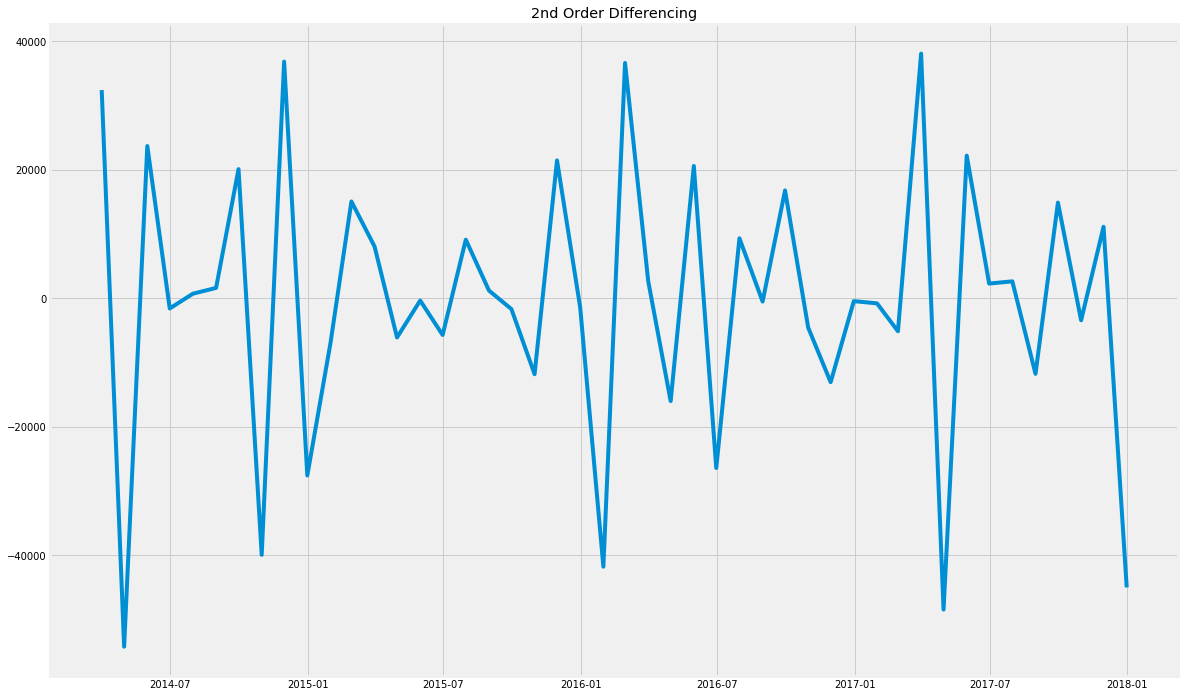

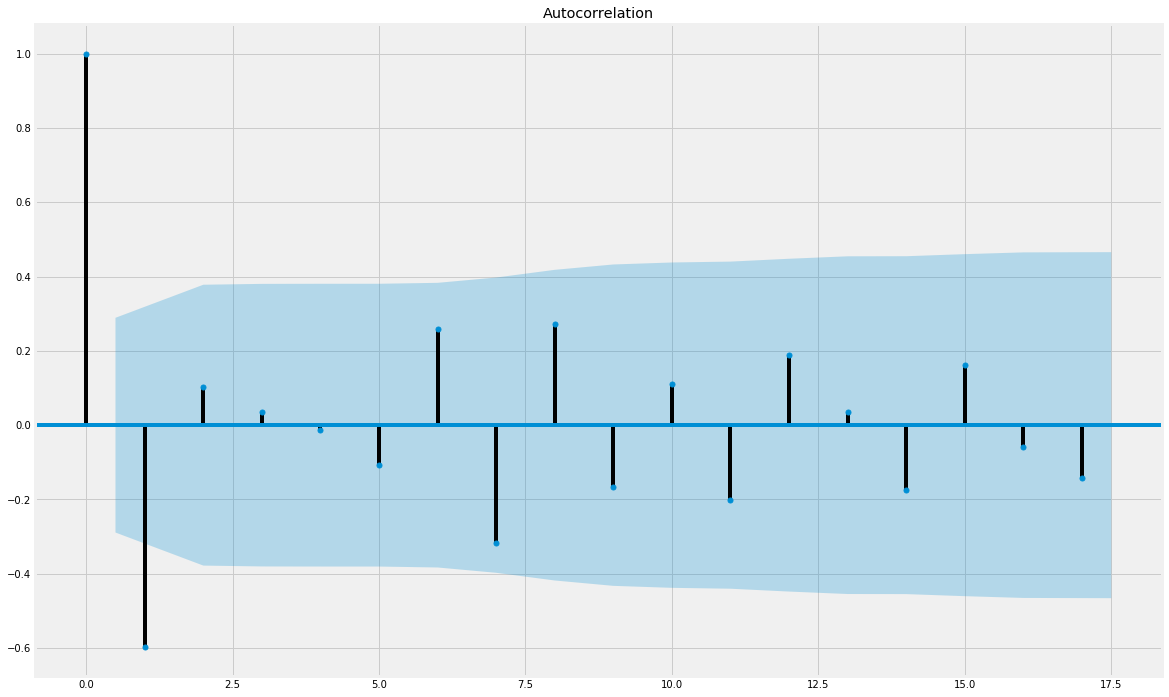

In [56]:
# 2nd order Differencing
plt.plot(ts.diff().diff()); 
plt.title('2nd Order Differencing')
acf2 = plot_acf(ts.diff().diff().dropna())

#### Observation

- For the above series, the time series reaches stationarity without ANY differencing. There is no any statistically   significant spikes seen in autocorrelation plot above. !!!

- Look at the 1st order differencing, with a lag of 1, the ACF goes into negative zone, indicates the over differenced.

- Therefore, I will consider d = 0 (or we can try with 1)

### (2) How to find the order of the AR term (p)

- After differencing the TS, we need to ensure there is no autocorrelation in the differenced time series 

- determine the AR and MA terms

- You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

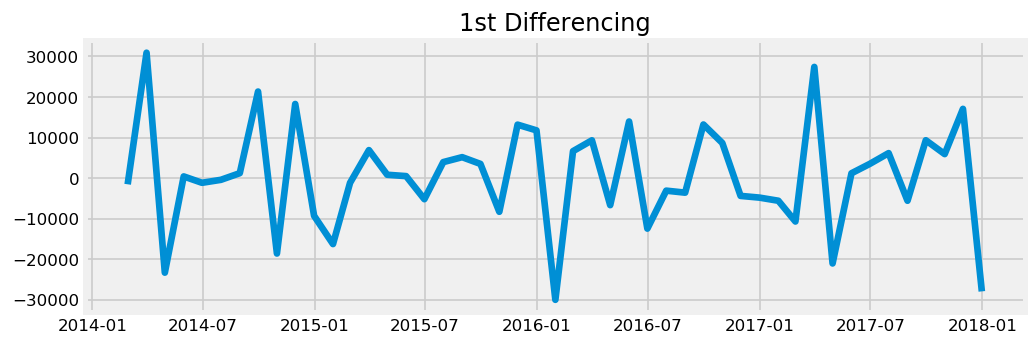

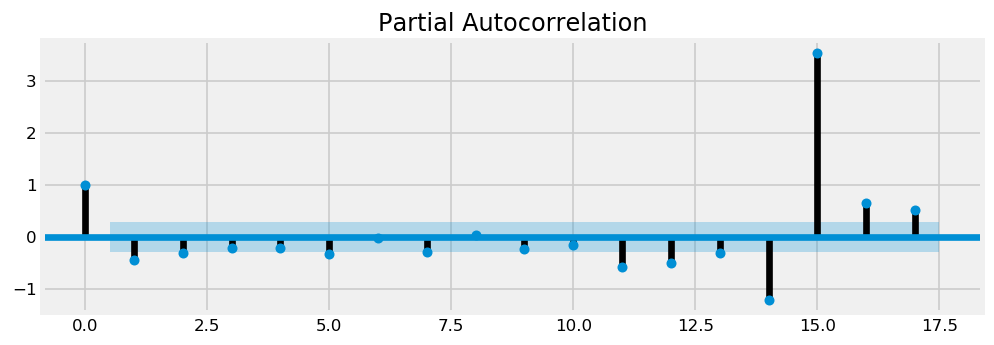

In [57]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
#fig, axes = plt.subplots(1, 2, sharex=True)

plt.plot(ts.diff()); 
plt.title('1st Differencing')
#plt.set(ylim=(0,5))

pacf = plot_pacf(ts.diff().dropna())

In above partial autocorrelation plot, we don't observe any significant spikes in lower order lags(however,a slight portion of first lag is into the negative zone). 

Therefore, we can be conservative and tentatively fix the p as 0 (we can try with 1 later).

###  (3) How to find the order of the MA term (q):

look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

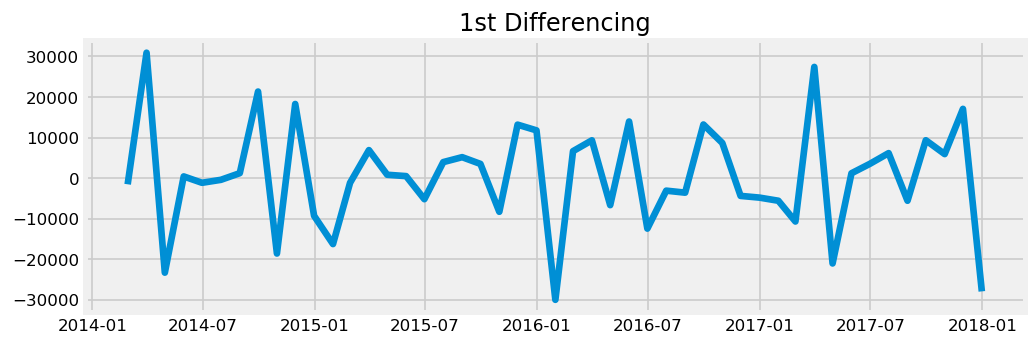

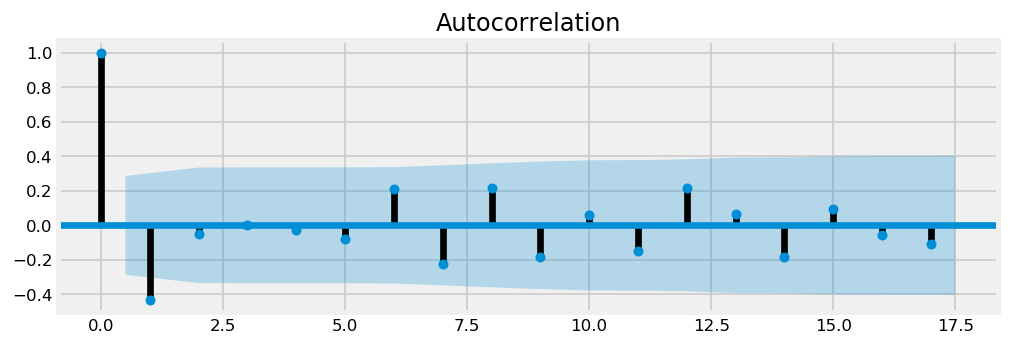

In [58]:
# fig, axes = plt.subplots(1, 2, sharex=True)

plt.plot(ts.diff()); 
plt.title('1st Differencing')

#axes[1].set(ylim=(0,1.2))

acf = plot_acf(ts.diff().dropna())

Even with lag 1 the autocorrelation is going negative

 Let’s tentatively fix q as 0.

### build the ARIMA Model:

Now that we've determined the values of p, d and q, we have everything needed to fit the ARIMA model. 

Let’s use the ARIMA() implementation in statsmodels package.

    we will consider d = 0 (later we can try with 1)
    we will consider p = 0 
    we will consider q = 0 

#### ARIMA with default settings of {0 , 0 , 0}

In [181]:
mod_default = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 0, 0),
                                seasonal_order=(1, 0 , 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default = mod_default.fit()

In [182]:
print(results_default.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.3031      0.111     11.719      0.000       1.085       1.521
ma.S.L12      -0.6105      0.201     -3.044      0.002      -1.004      -0.217
sigma2      9.358e+07   3.63e-10   2.57e+17      0.000    9.36e+07    9.36e+07


- The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients. 

- The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

- When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

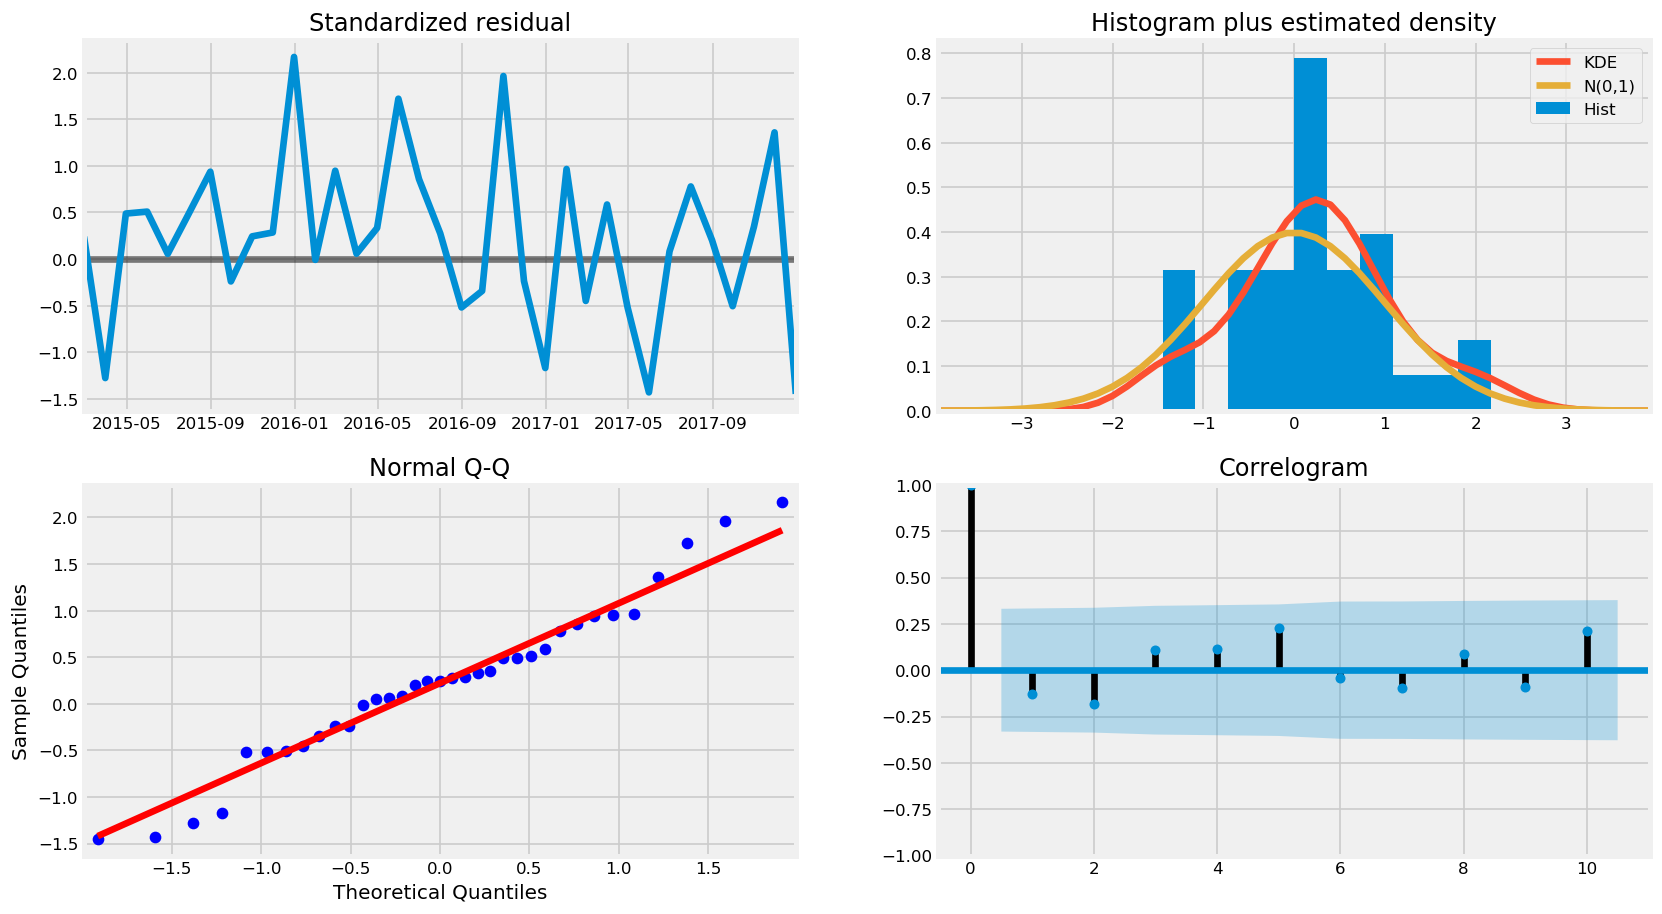

In [61]:
residuals_default = results_default.plot_diagnostics(figsize=(15, 9))

- Our primary concern is to ensure that the residuals of our model are 
    - uncorrelated and 
    - normally distributed with zero-mean. 
    
- If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

- In this case, our model diagnostics suggests that the model residuals are normally distributed. Plus more observations as follows:-

    - In the top right plot, we see that the red KDE line really does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Hence the residual plots are not perfectly normally distributed.
    
    - The qq-plot on the bottom left shows that the moderately ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is not really a strong indication that the residuals are normally distributed.
       
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

> Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

### Validating Forecasts:

We have obtained a model for our time series that can now be used to produce forecasts. 

We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts

The __get_prediction()__ and __conf_int()__ attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [62]:
Technology.columns

Index(['Sales', 'Year', 'Month', 'Weekday Name'], dtype='object')

In [63]:
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [64]:
# Validating forecasts
# To help us understand the accuracy of our forecasts, 
# we compare predicted sales to real sales of the time series, and we set forecasts 
# to start at 2016–12–31 to the end of the data.

In [65]:
type('Order Date')

str

In [70]:
Technology.head(10)

,Sales,Year,Month,Weekday Name
Order Date,,,,
2014-01-06,1147.94,2014,1,Monday
2014-01-09,31.20,2014,1,Thursday
2014-01-13,646.74,2014,1,Monday
2014-01-15,149.95,2014,1,Wednesday
2014-01-16,124.20,2014,1,Thursday
2014-01-20,699.93,2014,1,Monday
2014-01-26,343.33,2014,1,Sunday
2014-02-01,468.90,2014,2,Saturday
2014-02-02,180.96,2014,2,Sunday


In [71]:
Technology.tail(10)

,Sales,Year,Month,Weekday Name
Order Date,,,,
2017-12-18,149.320,2017,12,Monday
2017-12-21,352.970,2017,12,Thursday
2017-12-22,1503.752,2017,12,Friday
2017-12-23,494.970,2017,12,Saturday
2017-12-24,3359.922,2017,12,Sunday
2017-12-25,401.208,2017,12,Monday
2017-12-27,164.388,2017,12,Wednesday
2017-12-28,14.850,2017,12,Thursday
2017-12-29,302.376,2017,12,Friday


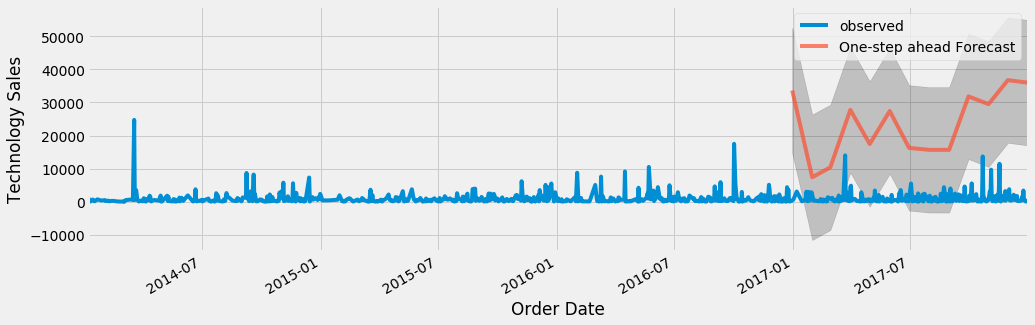

In [185]:
pred = results_default.get_prediction(start=pd.to_datetime('2016-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = Technology.loc['2014':]['Sales'].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Order Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()
# The line plot is showing the observed values compared to the rolling forecast predictions. 
# Overall, our forecasts slightly differs with the true values, but shows an upward trend starts from the 
# beginning of the year and captured the seasonality toward the end of the year.

In [166]:
# Predicted sales values
y_forecasted = pred.predicted_mean
# actual sales values
y_truth = Technology.loc['2016-12-31':]['Sales']

In [174]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 636198963.81


In [179]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 25222.98


In [ ]:
# In statistics, the mean squared error (MSE) of an estimator measures the average of the 
# squares of the errors — that is, the average squared difference between the estimated values 
# and what is estimated. 

# The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, 
# the closer we are to finding the line of best fit.

# Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily technology sales 
# in the test set within 252.22 of the real sales. 


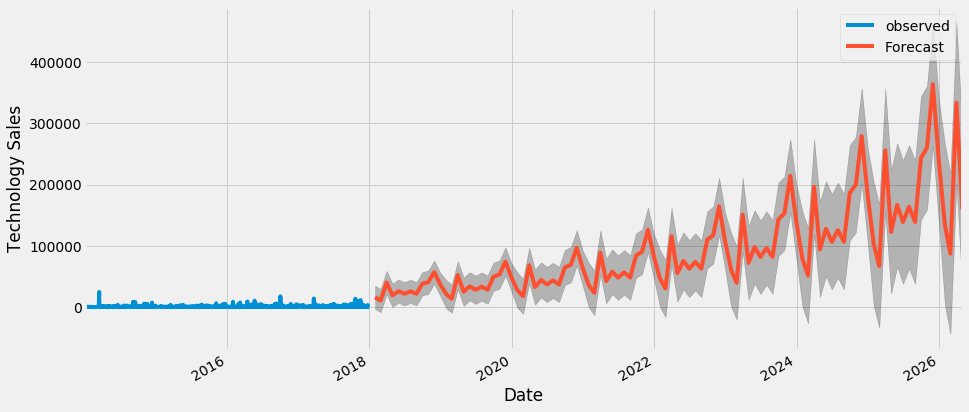

In [188]:
pred_uc = results_default.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = Technology['Sales'].plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

## let us try the best parameter search for the ARIMA model ...

### (1) Parameter Selection for the ARIMA Time Series Model

- When looking to fit time series data with a seasonal ARIMA model, our first goal is to find the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest. 

- There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. 

- I will use a "grid search" to iteratively explore different combinations of parameters. 

- For each combination of parameters, I fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. 

- Once I have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest. 

In [189]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [190]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [192]:
# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [193]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


I can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations. 

In Statistics and Machine Learning, this process is known as __grid search (or hyperparameter optimization)__ for model selection.

When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. 

I will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. 

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. 

Therefore, I am interested in finding the model that yields the lowest AIC value.

In [195]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

results_params = []
results_aic = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order       =param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            results_params.append(str(param) +'x'+ str(param_seasonal))
            results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1068.4418416026353
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1476.780127293862
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:745.9140153464062
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:768.0644040396821
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:740.2476175544022
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:513.9511875826613
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1028.58046984574
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5973.64865008439
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:727.6433704102246
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:770.0204982484048
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:749.4725814512726
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:515.455317992124
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1004.550332236837
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1130.4446487580592
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:747.975585755087
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:755.3518217854457
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:736.9456761029335
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:505.54562318515724
ARIMA(0, 1,

In [197]:
results_params_aic = zip(results_params, results_aic)
results_params_aic

In [198]:
# Sort the feature importances by most important first
results_params_aic = sorted(results_params_aic, key = lambda x: x[1], reverse = False)
results_params_aic[:5]

[('(1, 1, 1)x(1, 1, 0, 12)', 471.2282482531538),
 ('(1, 1, 0)x(1, 1, 0, 12)', 481.145525031969),
 ('(0, 1, 1)x(1, 1, 0, 12)', 490.1579369221266),
 ('(1, 0, 1)x(1, 1, 0, 12)', 491.07658933545),
 ('(1, 0, 0)x(1, 1, 0, 12)', 495.0964837175169)]

The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 471.22. 

We should therefore consider this to be the optimal option out of all the models we have considered.

## (2) Fitting an ARIMA Time Series Model:

In [199]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [200]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1840      0.377     -0.488      0.626      -0.923       0.555
ma.L1         -0.9755      0.295     -3.308      0.001      -1.554      -0.398
ar.S.L12      -0.3496      0.288     -1.213      0.225      -0.915       0.215
sigma2      1.022e+08   1.49e-09   6.85e+16      0.000    1.02e+08    1.02e+08


- The summary attribute that results from the output of SARIMAX returns a significant amount of information, but I'll focus our attention on the table of coefficients. 

- The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.(except ar.S.L12, lag 2

- When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

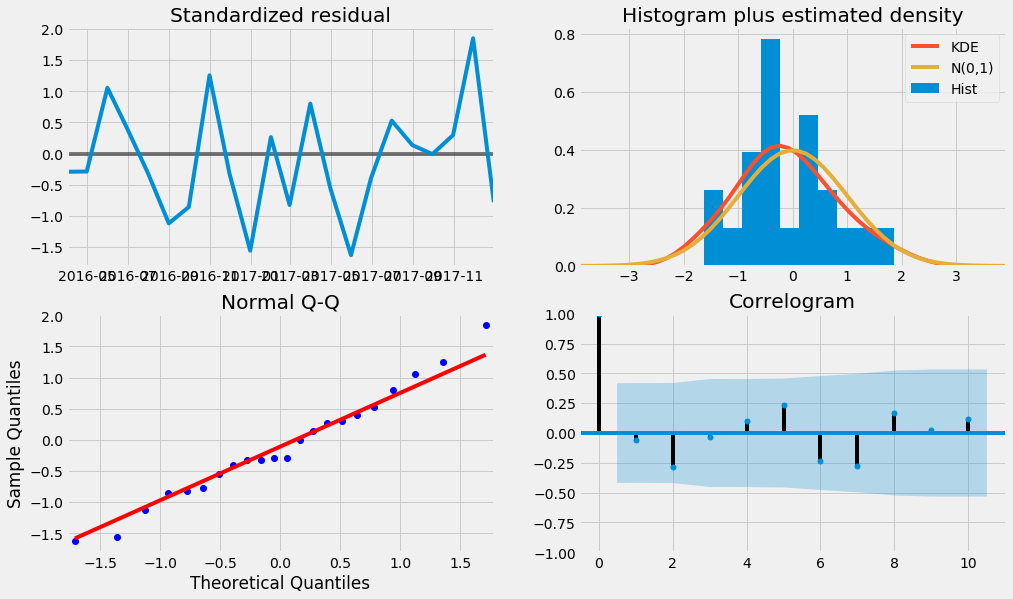

In [201]:
residuals = results.plot_diagnostics(figsize=(15, 9))

- Our primary concern is to ensure that the residuals of our model are 
    - uncorrelated and 
    - normally distributed with zero-mean. 
    
- If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

- In this case, our model diagnostics suggests that the model residuals are normally distributed. Plus more observations as follows:-

    - In the top right plot, we see that the red KDE line really does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Hence the residual plots are not perfectly normally distributed.
    
    - The qq-plot on the bottom left shows that the moderately ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is not really a strong indication that the residuals are normally distributed.
       
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

> Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

### Validating Forecasts

I have obtained a model for our time series that can now be used to produce forecasts. 

I start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

The __get_prediction()__ and __conf_int()__ attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [218]:
pred = results.get_prediction(start=pd.to_datetime('2016-12-31'), dynamic=False)

In [219]:
pred_ci = pred.conf_int()

The code above requires the forecasts to start at 31 DEC 2016.

In [220]:
# data_grouped['Sales']

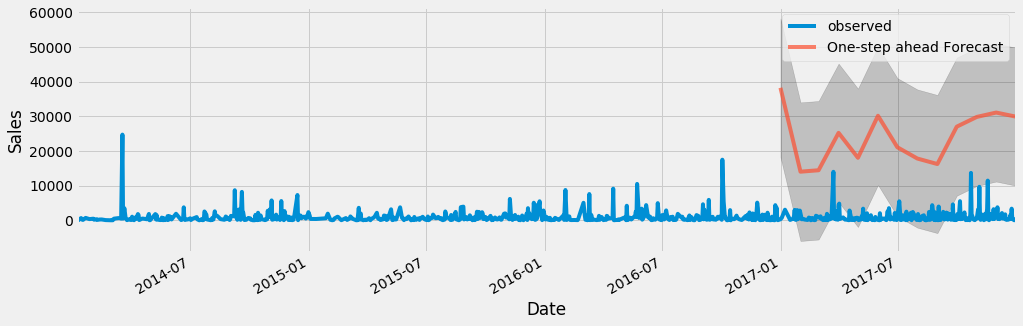

In [221]:
ax = Technology.loc['2014':]['Sales'].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend();

Overall, our forecasts slightly differs with the true values, but shows an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

## Accuracy of prediction (metrics)


MSE (Mean Squared Error)
which summarizes the average error of our forecasts.
For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

In [223]:
# Predicted sales values
y_forecasted = pred.predicted_mean

# actual sales values
y_truth = Technology.loc['2016-12-31':]['Sales']

In [224]:
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 621088473.8
The Root Mean Squared Error of our forecasts is 24921.65


### dynamic forecasts
dynamic=True

In [227]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-12-31'), dynamic=True)

In [228]:
pred_dynamic_ci = pred.conf_int()

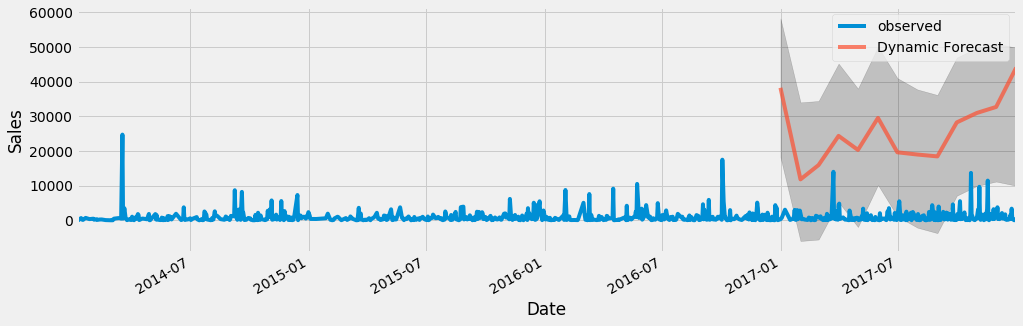

In [229]:
ax = Technology.loc['2014':]['Sales'].plot(label='observed')

pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend();

Evenwith this dynamic forcasts model, our forecasts slightly differs with the true values, but shows an upward trend starts from the  beginning of the year and captured the seasonality toward the end of the year
##### Lets validate the metrics

In [230]:
# Predicted sales values
y_forecasted = pred_dynamic.predicted_mean

# actual sales values
y_truth = Technology.loc['2016-12-31':]['Sales']

In [231]:
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 658892269.63
The Root Mean Squared Error of our forecasts is 25668.9


#### Producing and Visualizing future Forecasts
The get_forecast() attribute of our time series object can compute forecasted values for a specified number of steps ahead.

In [234]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

In [235]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

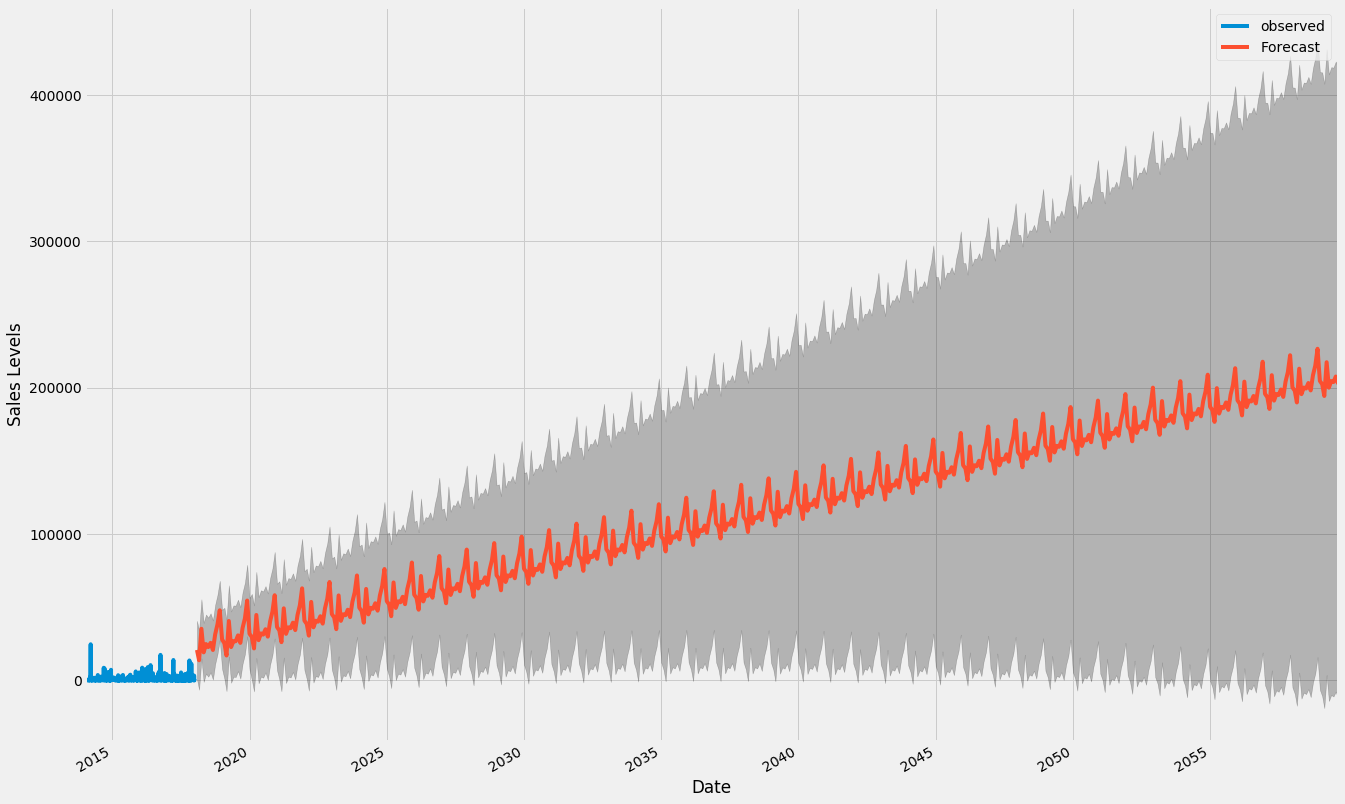

In [236]:
ax = Technology['Sales'].plot(label='observed', figsize=(20, 15))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Sales Levels')

plt.legend();

- Both the forecasts and associated confidence interval that we have generated can now be used to further understand the time series and foresee what to expect. 

- Our forecasts show that the time series is expected to increase linearly.

- As we forecast further out into the future, it is natural for us to become less confident in our values. 

- This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

## Future Improvements:

##### Here are a few other things we should try:
###### (1) Change the start date of the dynamic forecasts to see how this affects the overall quality of our forecasts.
###### (2) Try more combinations of parameters to see if we can improve the goodness-of-fit of the model.
###### (3) Select a different metric to select the best model. For example, we used the AIC measure to find the best model, but we   could seek to     optimize the out-of-sample mean square error instead.